<a href="https://colab.research.google.com/github/mskang222/NLP_2023/blob/main/12%EC%9B%94_7%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MINST_feature map(1)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

gray_scale = 255
X_train /= gray_scale
X_test /= gray_scale

In [4]:
num_classes = 10  #one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
def model():

    inputs = Input(shape=(28,28,1))      #inputs:변수, Input:함수
    x = Conv2D(24,kernel_size=(3,3),padding='same',activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes,activation="softmax")(x)

    model = Model(inputs,output)

    model.compile(loss='categorical_crossentropy',   # 비용함수 정의가 달라졌음
              optimizer='adam',
              metrics=['accuracy'])

    return model  #compile끝난 모델

In [7]:
model_s=model()     #model_s:구축된 모델
model_s.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        10416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 48)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          27712 

모델 네트워크 다른 방법으로 확인하기

In [8]:
from tensorflow.keras.utils import plot_model

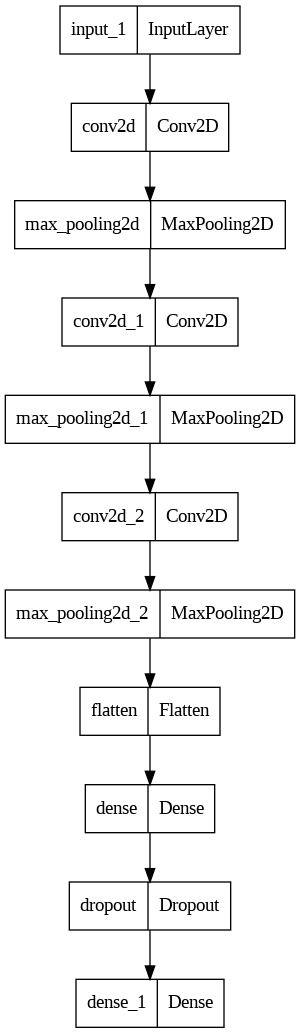

In [9]:
plot_model(model_s)

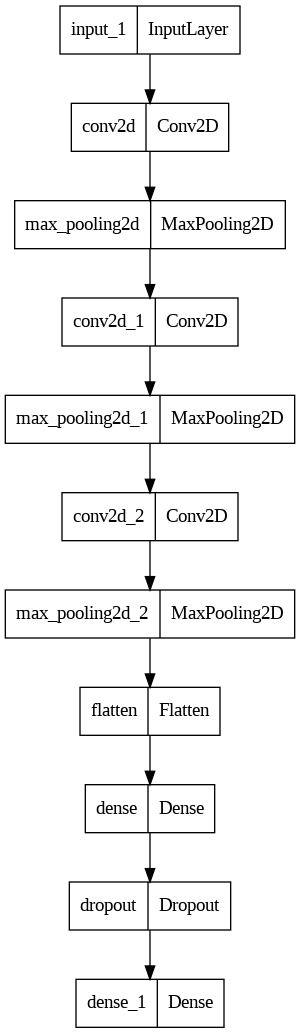

In [10]:
tf.keras.utils.plot_model(
    model_s)